In [26]:
import os
from collections import defaultdict

import fasttext
import fasttext.util

import matplotlib.pyplot as plt

In [27]:
training_path = '../scripts/semantic_learning/trainings/'
models = sorted([training_path + file_name for file_name in os.listdir('../scripts/semantic_learning/trainings') if file_name != '.DS_Store'])
print(models)
words = ['sunset', 'song', 'music', 'ibiza', 'people', 'school', 'laptop', 'computer', 'sand', 'sky', 'player']
print(words)

['../scripts/semantic_learning/trainings/fasttext_dim-100_epoch-10_loss-hs_nongrams', '../scripts/semantic_learning/trainings/fasttext_dim-100_epoch-10_loss-ns_nongrams', '../scripts/semantic_learning/trainings/fasttext_dim-100_epoch-7_loss-hs_nongrams', '../scripts/semantic_learning/trainings/fasttext_dim-100_epoch-7_loss-ns_nongrams', '../scripts/semantic_learning/trainings/fasttext_supervised']
['sunset', 'song', 'music', 'ibiza', 'people', 'school', 'laptop', 'computer', 'sand', 'sky', 'player']


In [28]:
neighbors = defaultdict(lambda: defaultdict(list))
for model_name in ['../scripts/semantic_learning/trainings/fasttext_dim-100_epoch-7_loss-hs_nongrams', '../scripts/semantic_learning/trainings/fasttext_supervised']:
    model = fasttext.load_model(model_name + '/supervised_model.bin')
    if 'supervised' in model_name:
        print(model.test('../data/corpus_valid.txt'))
    for word in words:
        neighbors[model_name][word] = model.get_nearest_neighbors(word)

(602127, 0.7468142102911844, 0.06137680804346197)


In [29]:
for model_name in neighbors:
    print(model_name.split('/')[-1])
    for word in words:
        print(word, [x for x in neighbors[model_name][word] if x[0] >= 0.6])
    print()

fasttext_dim-100_epoch-7_loss-hs_nongrams
sunset [(0.8617753386497498, 'sunrise'), (0.7498640418052673, 'dusk'), (0.7480682134628296, 'twilight'), (0.7005783915519714, 'sea'), (0.6984926462173462, 'cloudy'), (0.6844289898872375, 'jetty'), (0.6735334396362305, 'lake'), (0.6686261892318726, 'ocean'), (0.6632625460624695, 'foreground'), (0.6624375581741333, 'pier')]
song [(0.746880829334259, 'songs'), (0.7412995100021362, 'sings'), (0.6545684933662415, 'sing'), (0.6517430543899536, 'voice'), (0.6449910998344421, 'singing'), (0.6435425281524658, 'tunes'), (0.6390900015830994, 'melody'), (0.6193773150444031, 'sang'), (0.6168822646141052, 'lyrics'), (0.6165723204612732, 'microphone')]
music [(0.7306813597679138, 'performer'), (0.6663976311683655, 'video'), (0.6407639980316162, 'vj'), (0.6342215538024902, 'program'), (0.6087695360183716, 'appears')]
ibiza []
people [(0.6680805683135986, 'group'), (0.6508774161338806, 'diverse'), (0.6133853793144226, 'friends')]
school [(0.736855685710907, 'el

In [12]:
selected_model = '../scripts/semantic_learning/trainings/fasttext_dim-100_epoch-7_loss-hs_nongrams/supervised_model.bin'
reduced_model = fasttext.util.reduce_model(fasttext.load_model(selected_model), 2)

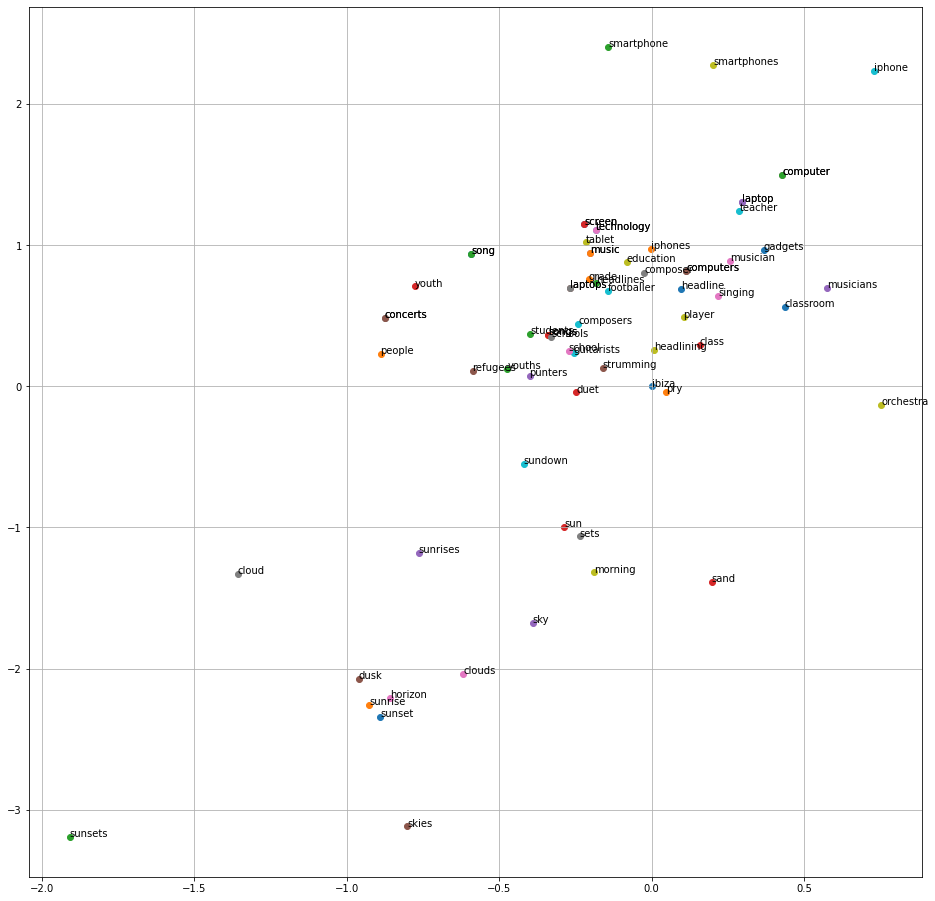

In [13]:
model = fasttext.load_model(selected_model)
plt.figure(figsize=(16, 16))
for word in words:
    plt.scatter(*reduced_model[word].tolist())
    plt.annotate(word, reduced_model[word].tolist())
    for confidence, neighbor in model.get_nearest_neighbors(word):
        if confidence >= 0.7:
            plt.scatter(*reduced_model[neighbor].tolist())
            plt.annotate(neighbor, reduced_model[neighbor].tolist())
plt.grid()
plt.show()

In [14]:
model.get_nearest_neighbors('</s>', k=10)

[(0.5396199226379395, 'miners'),
 (0.5261949300765991, 'installment'),
 (0.5231472849845886, 'normally'),
 (0.5105646848678589, 'dries'),
 (0.5041940808296204, 'jade'),
 (0.5025537610054016, 'seductively'),
 (0.5017343163490295, 'bc'),
 (0.5007004141807556, 'upright'),
 (0.4923630952835083, 'revered'),
 (0.4885702133178711, 'bullets')]

In [15]:
%%timeit
# dim=100
model.get_nearest_neighbors(word, k=1)

1.47 ms ± 3.18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
%%timeit
# dim=200
model.get_nearest_neighbors(word)

3.47 ms ± 5.54 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
